In [12]:
import pandas as pd
framingham = pd.read_csv('framingham.csv')
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


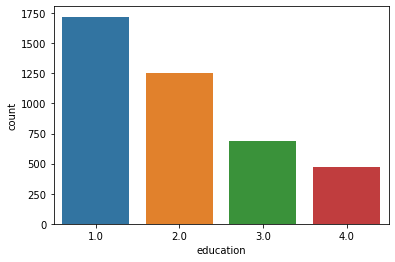

In [13]:
import seaborn as sns
sns.countplot(x='education', data=framingham)

Most participants seem to have some form of high school education. A fewer number of them have a diploma or went to college, and very few have a degree.

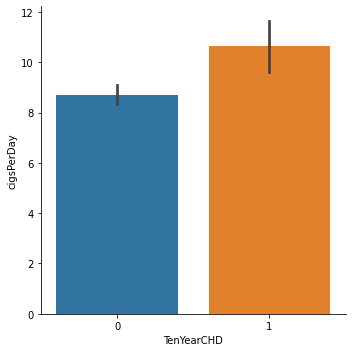

In [14]:
sns.catplot(x='TenYearCHD', y='cigsPerDay', kind='bar', data=framingham)

It can be seen that patients who have a ten year CHD risk smoke more cigarettes per day than those who do not.

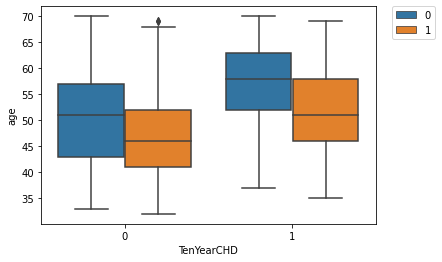

In [15]:
import matplotlib.pyplot as plt
sns.boxplot(x='TenYearCHD', y='age', hue='currentSmoker', data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From here, it can be seen that older patients are more likely to develop CHD. Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

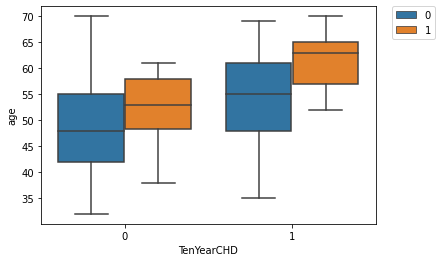

In [16]:
sns.boxplot(x='TenYearCHD', y='age', hue='prevalentStroke', data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks as though strokes are more prevalent in participants of an older age group.

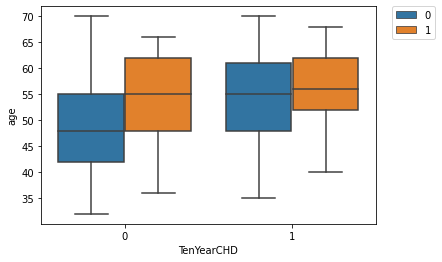

In [17]:
sns.boxplot(x='TenYearCHD', y='age', hue='diabetes', data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Again, it looks as though an older participant is more likely to have diabetes than a younger one.

In [18]:
framingham.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [19]:
framingham = framingham.dropna()

In [20]:
framingham['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X= framingham.drop('TenYearCHD', axis=1)
y= framingham['TenYearCHD']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.35)

In [30]:
import imblearn
import sklearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
pipeline = sklearn.pipeline.Pipeline([
  ("mapper", mapper),
  ("pipeline", imblearn.pipeline.Pipeline([
    ("sampler", sampler),
    ("classifier", classifier)
  ]))
])

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.35)

steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

NameError: name 'mapper' is not defined

In [32]:
pipeline.fit(X_train,y_train)
pipepred = pipeline.predict(X_test)

NameError: name 'pipeline' is not defined

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))